In [7]:
%%writefile kidsandAdults_yolo_config.yaml
path: ./children_and_adults_balanced
train: images/train
val: images/val

names:
  0: kid
  1: adult

Overwriting kidsandAdults_yolo_config.yaml


In [8]:
pip install ultralytics

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## ingat jalanin code ini dulu guys, soalnya dataset dari roboflow, labels nya terbalik

jadi fungsi code ini buat terbalikin labels nya, 0 -> kid , 1 -> adult

ingat di bagian folders diganti path nya sesuaikan dengan nama dataset roboflow yang kalian bikin


In [12]:
import os

folders = [
    "childrenvsadults/train/labels", #path disesuaikan
    "childrenvsadults/valid/labels", #path disesuaikan
    "childrenvsadults/test/labels" #path disesuaikan
]

for folder in folders:
    for file_name in os.listdir(folder):
        if file_name.endswith(".txt"):
            file_path = os.path.join(folder, file_name)
            with open(file_path, "r") as f:
                lines = f.readlines()
            new_lines = []
            for line in lines:
                parts = line.strip().split()
                label = parts[0]
                new_label = "1" if label == "0" else "0"  # swap 0 ↔ 1
                new_lines.append(" ".join([new_label] + parts[1:]))
            with open(file_path, "w") as f:
                f.write("\n".join(new_lines))
print("Swap label selesai di semua folder!")


Swap label selesai di semua folder!


In [8]:
import os
from collections import Counter

label_dirs = [
    "childrenvsadults/train/labels",
    "childrenvsadults/valid/labels",
    "hildrenvsadults/test/labels"
]

counts = Counter()

for labels_dir in label_dirs:
    for root, _, files in os.walk(labels_dir):
        for file in files:
            if file.endswith(".txt"):
                with open(os.path.join(root, file), "r") as f:
                    for line in f:
                        cls = int(line.split()[0])
                        counts[cls] += 1

print("Jumlah label per class setelah swap:", counts)


Jumlah label per class setelah swap: Counter({0: 1010, 1: 980})


In [ ]:
import os
import shutil

# --- PENGATURAN PATH ---
# Silakan sesuaikan path ini dengan struktur folder Anda

# 1. Path ke folder sumber pertama
sumber_1 = {
    "images_train": "datasetA/children_and_adults/images/train",
    "labels_train": "datasetA/children_and_adults/labels/train",
    "images_valid": "datasetA/children_and_adults/images/val", # folder ini 'val'
    "labels_valid": "datasetA/children_and_adults/labels/val"  # folder ini 'val'
}

# 2. Path ke folder sumber kedua
sumber_2 = {
    "images_train": "datasetB/train/images",
    "labels_train": "datasetB/train/labels",
    "images_valid": "datasetB/valid/images",
    "labels_valid": "datasetB/valid/labels"
}

# 3. Path ke folder tujuan (dataset gabungan)
tujuan = {
    "images_train": "dataset_gabungan/images/train",
    "labels_train": "dataset_gabungan/labels/train",
    "images_valid": "dataset_gabungan/images/valid",
    "labels_valid": "dataset_gabungan/labels/valid"
}
# -------------------------

# Fungsi untuk membuat folder jika belum ada
def buat_folder_tujuan():
    print("Membuat struktur folder tujuan...")
    for path in tujuan.values():
        os.makedirs(path, exist_ok=True)
    print("Folder tujuan siap.\n")

# Fungsi untuk menyalin file dari satu sumber ke tujuan
def salin_file(folder_sumber, folder_tujuan):
    if not os.path.exists(folder_sumber):
        print(f"Peringatan: Folder sumber tidak ditemukan: {folder_sumber}")
        return 0
        
    file_list = os.listdir(folder_sumber)
    for nama_file in file_list:
        path_sumber_file = os.path.join(folder_sumber, nama_file)
        path_tujuan_file = os.path.join(folder_tujuan, nama_file)
        shutil.copy(path_sumber_file, path_tujuan_file)
    return len(file_list)

# --- PROSES UTAMA ---
def gabungkan_dataset():
    buat_folder_tujuan()
    
    # Looping untuk setiap kategori (images_train, labels_train, dll.)
    for key in tujuan.keys():
        print(f"--- Menggabungkan '{key}' ---")
        
        # Salin dari sumber 1
        jumlah_1 = salin_file(sumber_1[key], tujuan[key])
        print(f"Menyalin {jumlah_1} file dari {sumber_1[key]}")
        
        # Salin dari sumber 2
        jumlah_2 = salin_file(sumber_2[key], tujuan[key])
        print(f"Menyalin {jumlah_2} file dari {sumber_2[key]}")
        
        print(f"Total file di '{tujuan[key]}': {len(os.listdir(tujuan[key]))}\n")
        
    print("===== Proses penggabungan selesai! =====")

# Jalankan fungsi utama
if __name__ == "__main__":
    gabungkan_dataset()

Membuat struktur folder tujuan...
Folder tujuan siap.

--- Menggabungkan 'images_train' ---
Menyalin 428 file dari archive/children_and_adults/images/train
Menyalin 1471 file dari childrenvsadults/train/images
Total file di 'dataset_gabungan/images/train': 1899

--- Menggabungkan 'labels_train' ---
Menyalin 428 file dari archive/children_and_adults/labels/train
Menyalin 1471 file dari childrenvsadults/train/labels
Total file di 'dataset_gabungan/labels/train': 1899

--- Menggabungkan 'images_valid' ---
Menyalin 80 file dari archive/children_and_adults/images/val
Menyalin 101 file dari childrenvsadults/valid/images
Total file di 'dataset_gabungan/images/valid': 181

--- Menggabungkan 'labels_valid' ---
Menyalin 80 file dari archive/children_and_adults/labels/val
Menyalin 101 file dari childrenvsadults/valid/labels
Total file di 'dataset_gabungan/labels/valid': 181

===== Proses penggabungan selesai! =====


In [41]:
!pip uninstall torch torchvision torchaudio -y


Found existing installation: torch 2.7.1+cu118
Uninstalling torch-2.7.1+cu118:
  Successfully uninstalled torch-2.7.1+cu118
Found existing installation: torchvision 0.22.1+cu118
Uninstalling torchvision-0.22.1+cu118:
  Successfully uninstalled torchvision-0.22.1+cu118
Found existing installation: torchaudio 2.7.1+cu118
Uninstalling torchaudio-2.7.1+cu118:
  Successfully uninstalled torchaudio-2.7.1+cu118
^C


Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.7.1%2Bcu118-cp310-cp310-win_amd64.whl.metadata (27 kB)
  Using cached https://download.pytorch.org/whl/cu118/torchvision-0.22.1%2Bcu118-cp310-cp310-win_amd64.whl.metadata (6.3 kB)
  Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.7.1%2Bcu118-cp310-cp310-win_amd64.whl.metadata (6.8 kB)
Using cached https://download.pytorch.org/whl/cu118/torch-2.7.1%2Bcu118-cp310-cp310-win_amd64.whl (2817.2 MB)
Using cached https://download.pytorch.org/whl/cu118/torchvision-0.22.1%2Bcu118-cp310-cp310-win_amd64.whl (5.5 MB)
Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.7.1%2Bcu118-cp310-cp310-win_amd64.whl (4.1 MB)

   ---------------------------------------- 0/3 [torch]
   ---------------------------------------- 0/3 [torch]
   ---------------------------------------- 0/3 [torch]
   ---------------------------------------- 0/3 [torch]
   ------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.7.1%2Bcu118-cp310-cp310-win_amd64.whl.metadata (27 kB)
  Using cached https://download.pytorch.org/whl/cu118/torchvision-0.22.1%2Bcu118-cp310-cp310-win_amd64.whl.metadata (6.3 kB)
  Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.7.1%2Bcu118-cp310-cp310-win_amd64.whl.metadata (6.8 kB)
Using cached https://download.pytorch.org/whl/cu118/torch-2.7.1%2Bcu118-cp310-cp310-win_amd64.whl (2817.2 MB)
Using cached https://download.pytorch.org/whl/cu118/torchvision-0.22.1%2Bcu118-cp310-cp310-win_amd64.whl (5.5 MB)
Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.7.1%2Bcu118-cp310-cp310-win_amd64.whl (4.1 MB)

   ---------------------------------------- 0/3 [torch]
   ---------------------------------------- 0/3 [torch]
   ---------------------------------------- 0/3 [torch]
   ---------------------------------------- 0/3 [torch]
   ------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import torch
print(torch.__version__)        # harusnya keluar 2.7.1+cu118 atau mirip
print(torch.cuda.is_available()) # harus True
print(torch.cuda.get_device_name(0)) # harus NVIDIA GeForce RTX 3050


2.7.1+cu118
True
NVIDIA GeForce RTX 3050 Laptop GPU


In [9]:
# Retrain model on combined dataset
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # or your previous trained weights
results = model.train(
    data="dataset_gabungan/data_gabungan.yaml",
    epochs=25,
    imgsz=640,
    device=0   # gunakan GPU pertama (RTX 3050)
)



New https://pypi.org/project/ultralytics/8.3.214 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.204  Python-3.10.0 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset_gabungan/data_gabungan.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train11, n

In [15]:
# --- 2. SALIN MODEL TERBAIK SECARA OTOMATIS ---
# Dapatkan path ke direktori tempat hasil training disimpan (misal: runs/detect/train2)
save_dir = results.save_dir

# Buat path lengkap menuju file 'best.pt'
source_path = os.path.join(save_dir, 'weights/best.pt')

# Tentukan nama file tujuan
destination_path = "kdandadult-model.pt"

# Salin file model terbaik ke direktori utama
shutil.copy(source_path, destination_path)

print("\n✅ Training Selesai!")
print(f"✨ Model terbaik berhasil disalin ke: {destination_path}")



✅ Training Selesai!
✨ Model terbaik berhasil disalin ke: kdandadult-model.pt


📊 Menampilkan file results.csv:


,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,29.4269,1.08287,1.96740,1.40066,0.56902,0.73931,0.70759,0.41703,1.29264,1.51600,1.64695,0.000551,0.000551,0.000551
1,2,54.5091,1.18786,1.61540,1.46288,0.74245,0.60920,0.71588,0.40501,1.35417,1.45128,1.69254,0.001063,0.001063,0.001063
2,3,80.1777,1.23962,1.53467,1.47761,0.63111,0.71012,0.71788,0.38238,1.53604,1.46178,1.87995,0.001531,0.001531,0.001531
3,4,106.3930,1.22128,1.43478,1.46839,0.68799,0.59187,0.70718,0.39848,1.28568,1.72219,1.60330,0.001469,0.001469,0.001469
4,5,132.0490,1.17829,1.36065,1.45293,0.71475,0.72581,0.77836,0.46834,1.25443,1.28308,1.54419,0.001403,0.001403,0.001403
5,6,159.2340,1.16935,1.28453,1.44211,0.62114,0.68527,0.70902,0.40546,1.34824,1.37678,1.63022,0.001337,0.001337,0.001337
6,7,184.5440,1.11418,1.20664,1.39865,0.76002,0.77607,0.84151,0.50445,1.27696,1.04672,1.55043,0.001271,0.001271,0.001271
7,8,210.0090,1.10468,1.14886,1.38257,0.77531,0.79586,0.85238,0.53614,1.19767,0.97923,1.50449,0.001205,0.001205,0.001205
8,9,235.5860,1.08250,1.13729,1.36902,0.77382,0.71321,0.78375,0.47354,1.28793,1.22625,1.54621,0.001139,0.001139,0.001139
9,10,262.1420,1.07349,1.08871,1.36316,0.82697,0.79726,0.87012,0.56608,1.07361,0.87788,1.37386,0.001073,0.001073,0.001073



📈 Menampilkan grafik results.png:


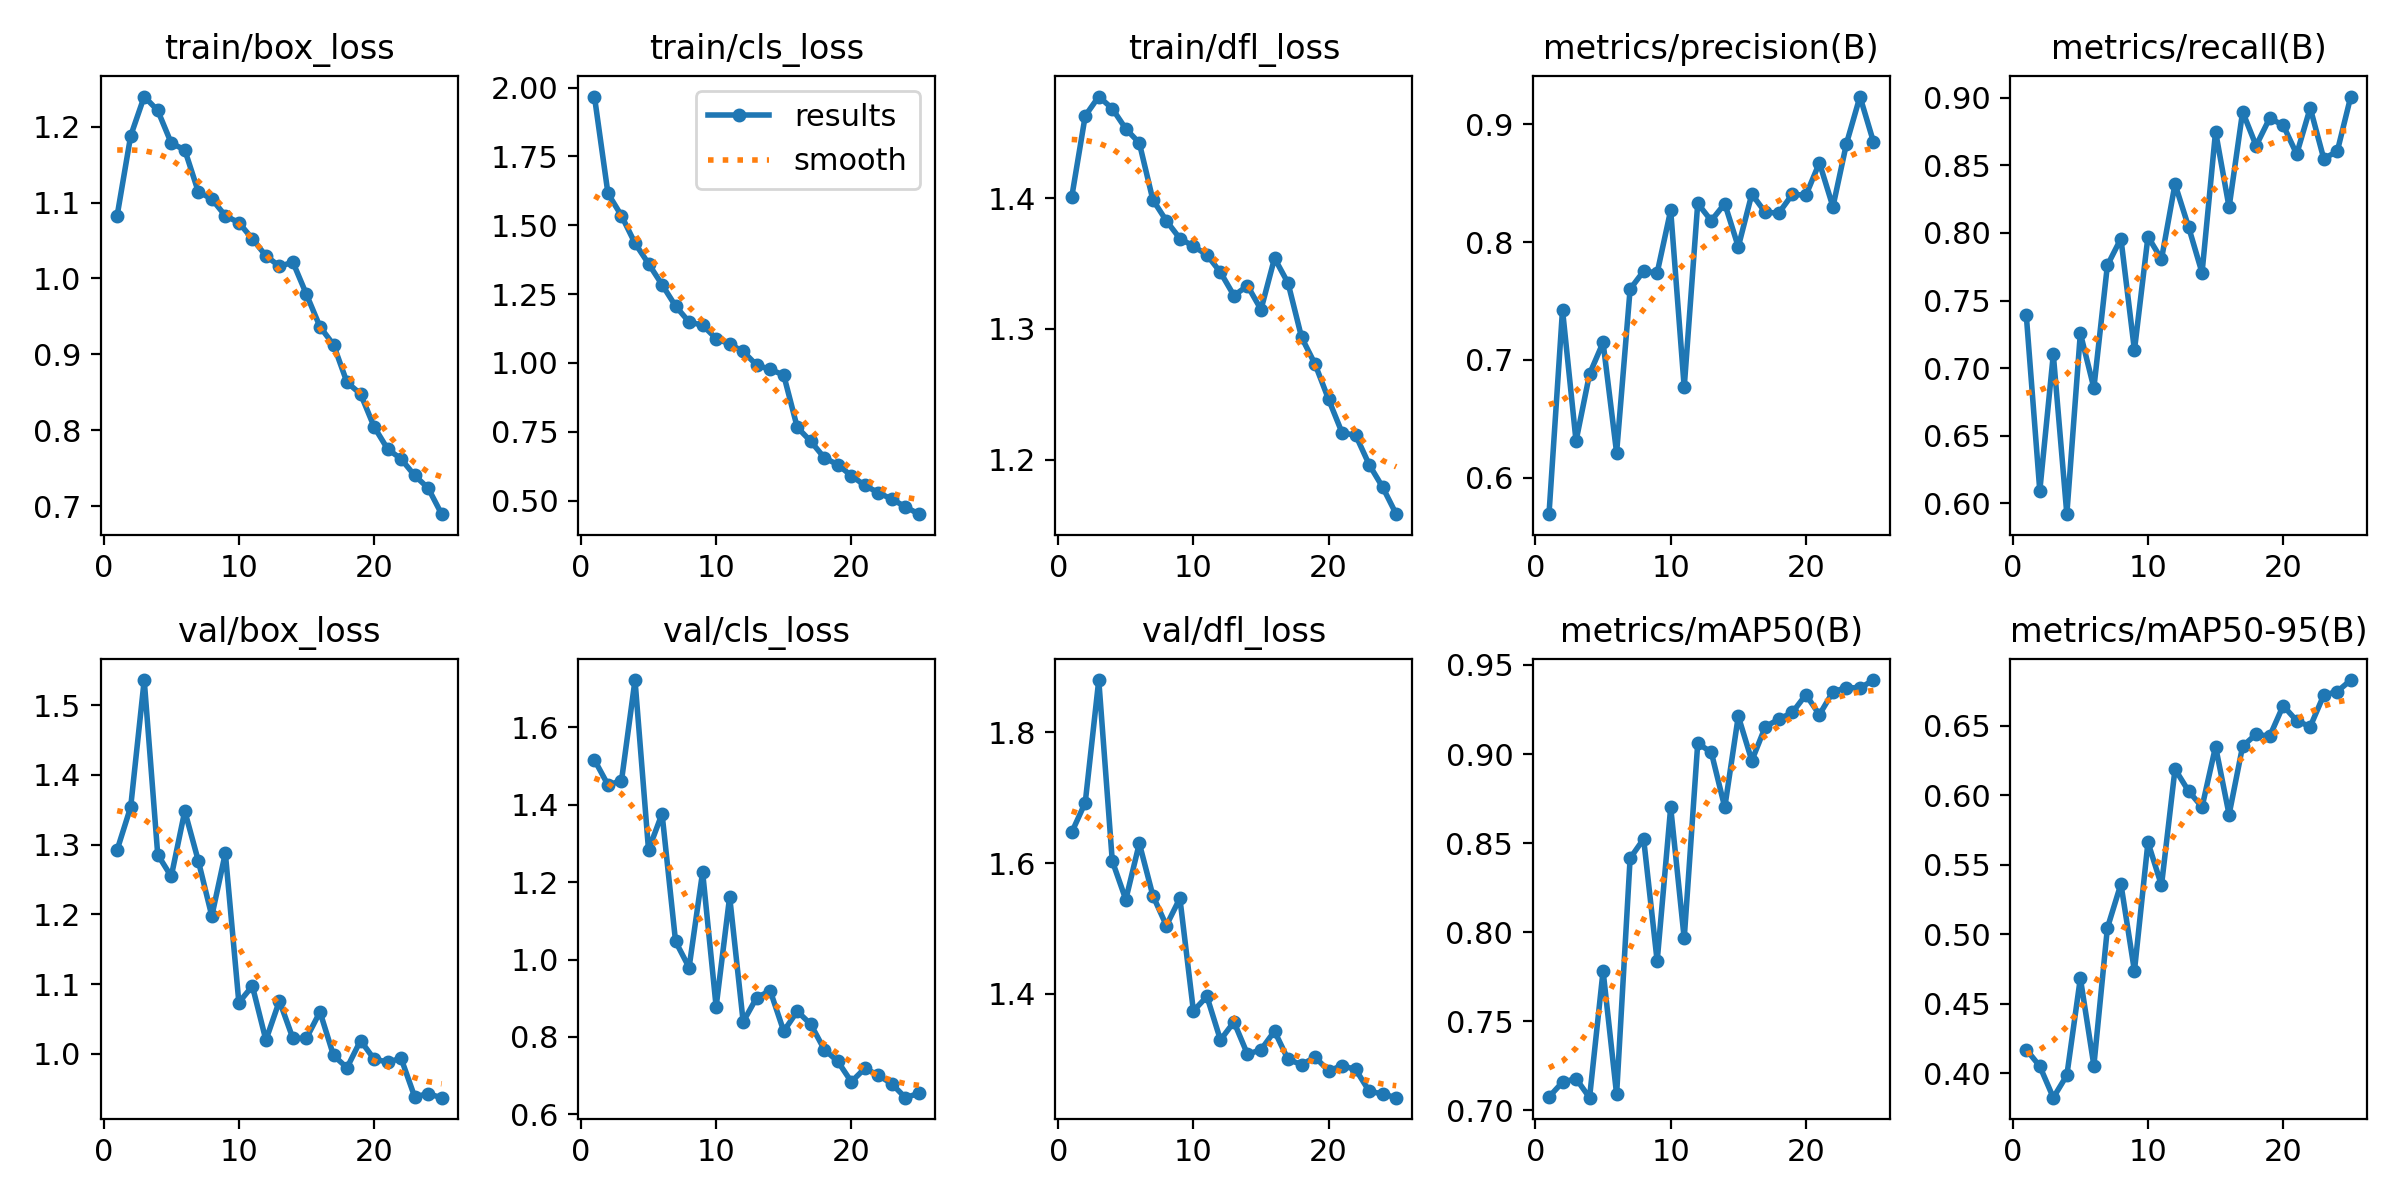


🖼️ Menampilkan Confusion Matrix (Jumlah Prediksi):


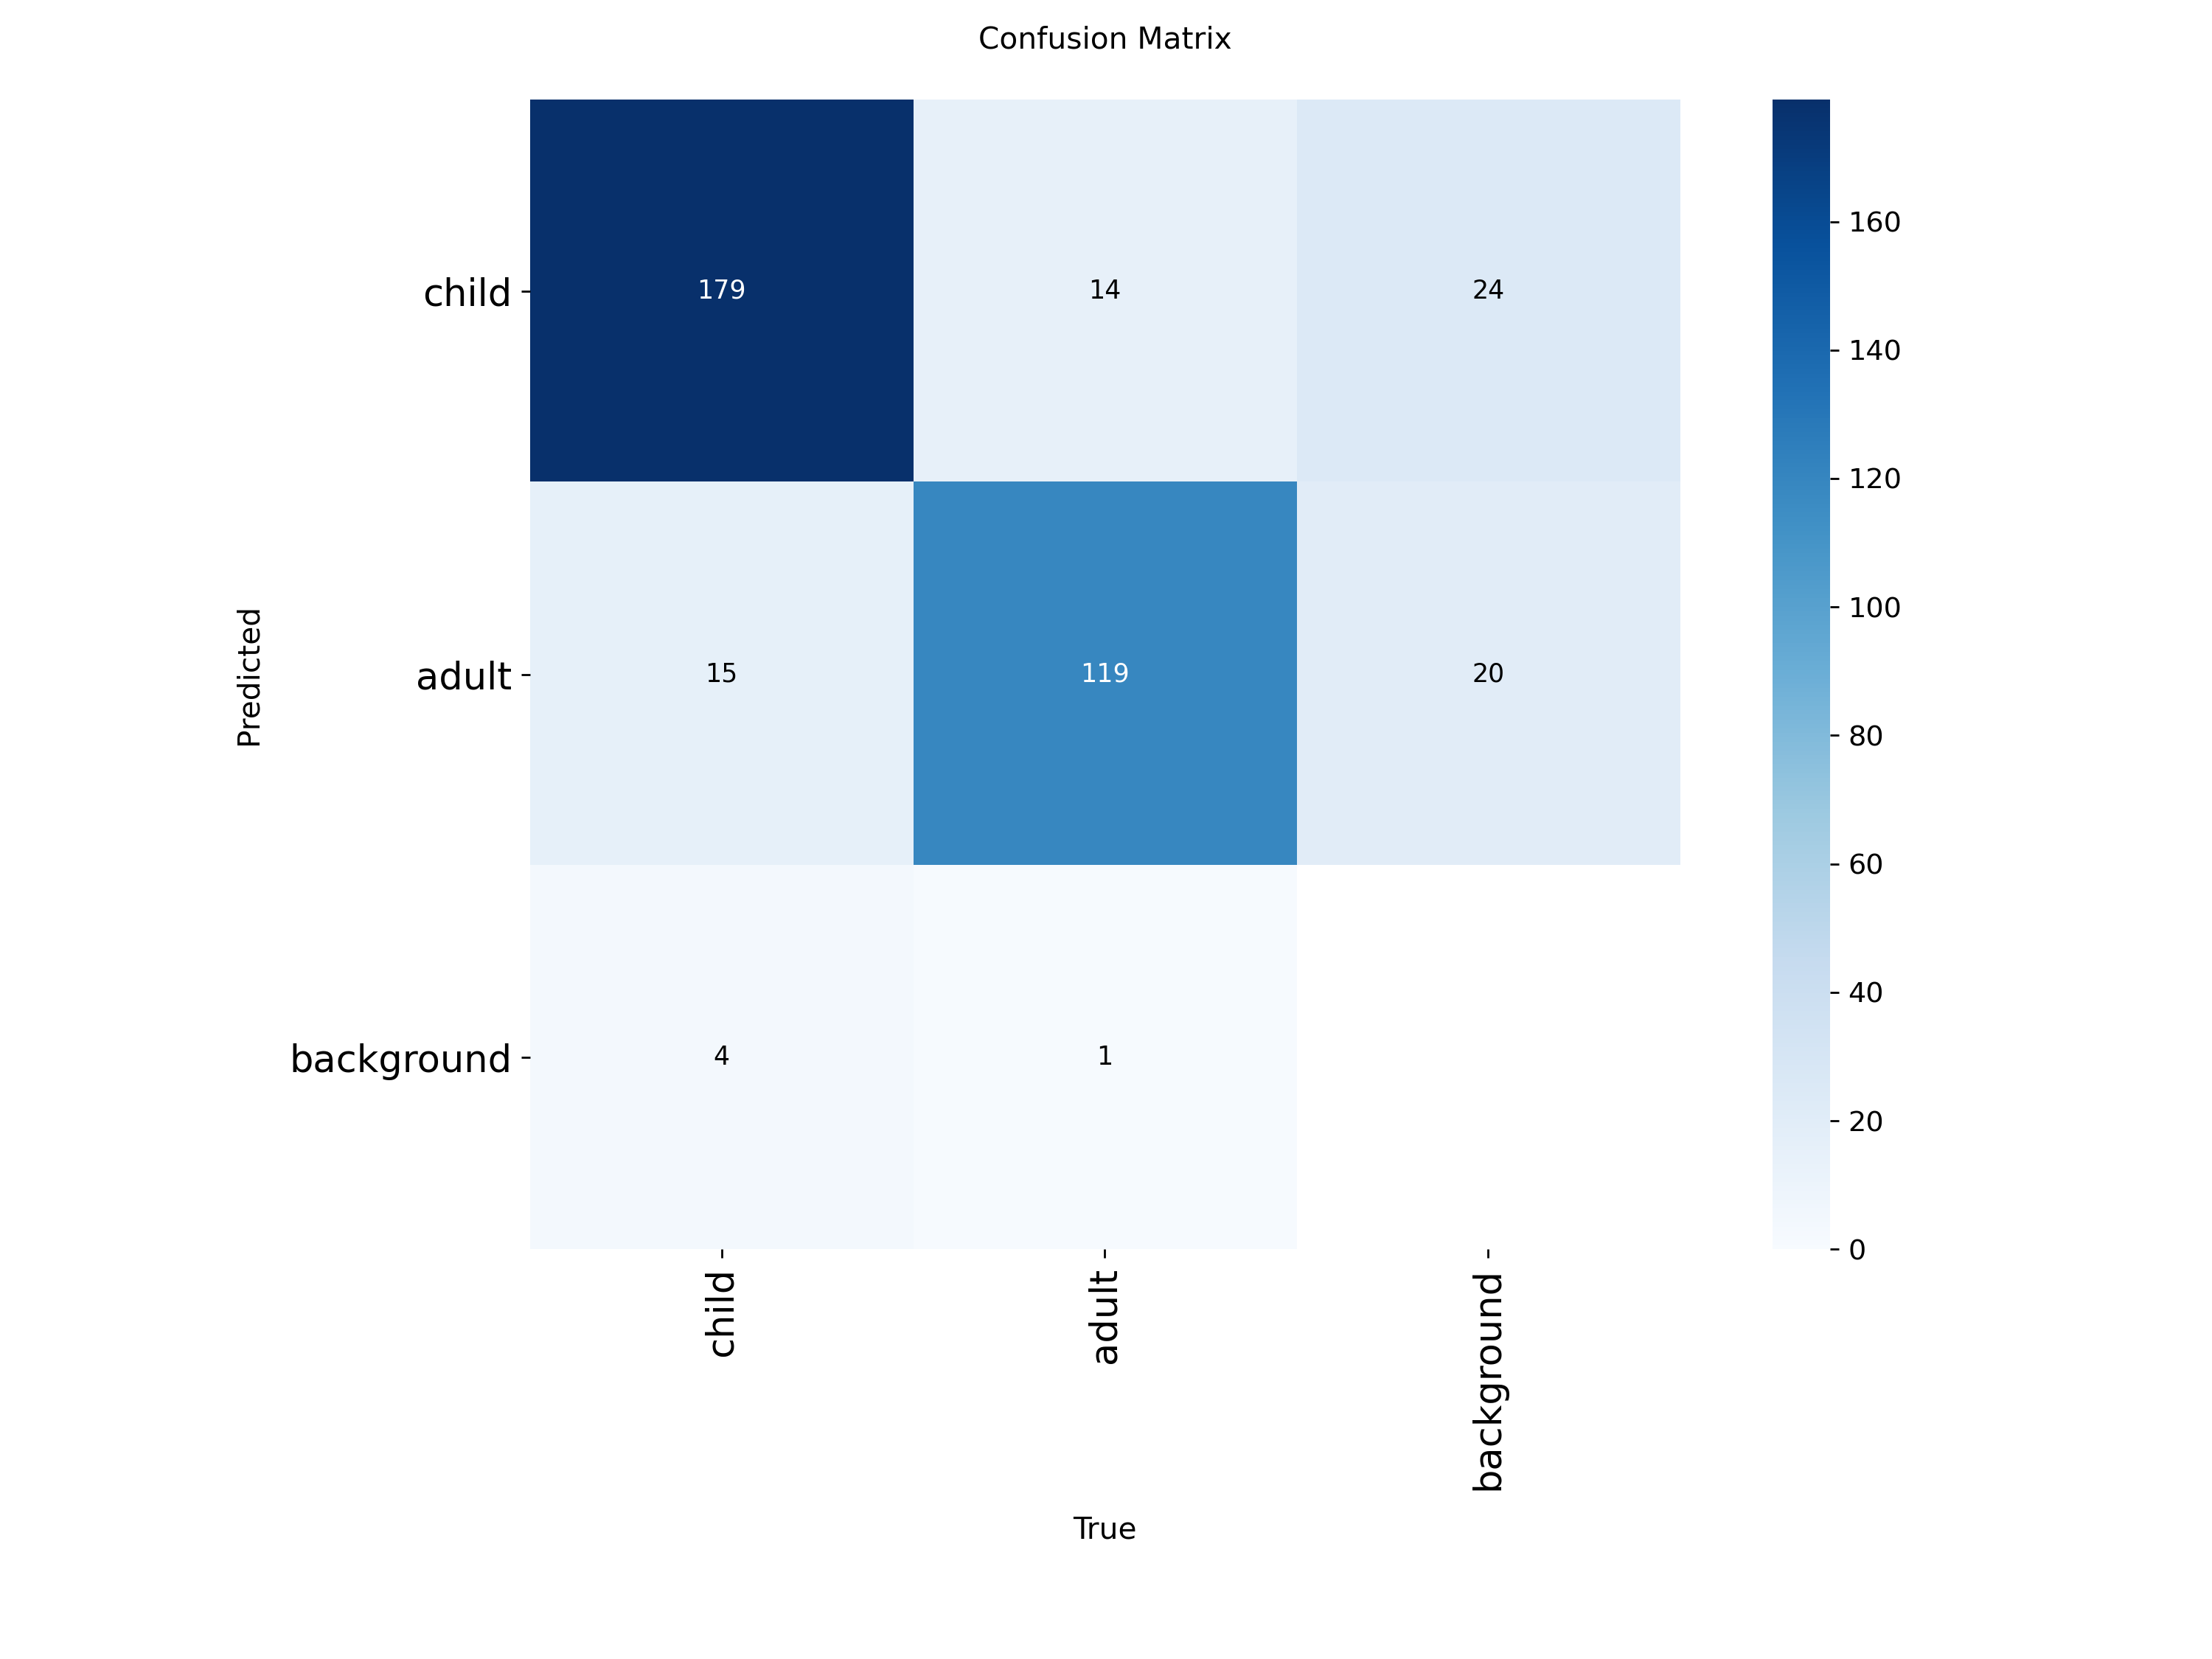


🖼️ Menampilkan Confusion Matrix (Normalisasi/Persentase):


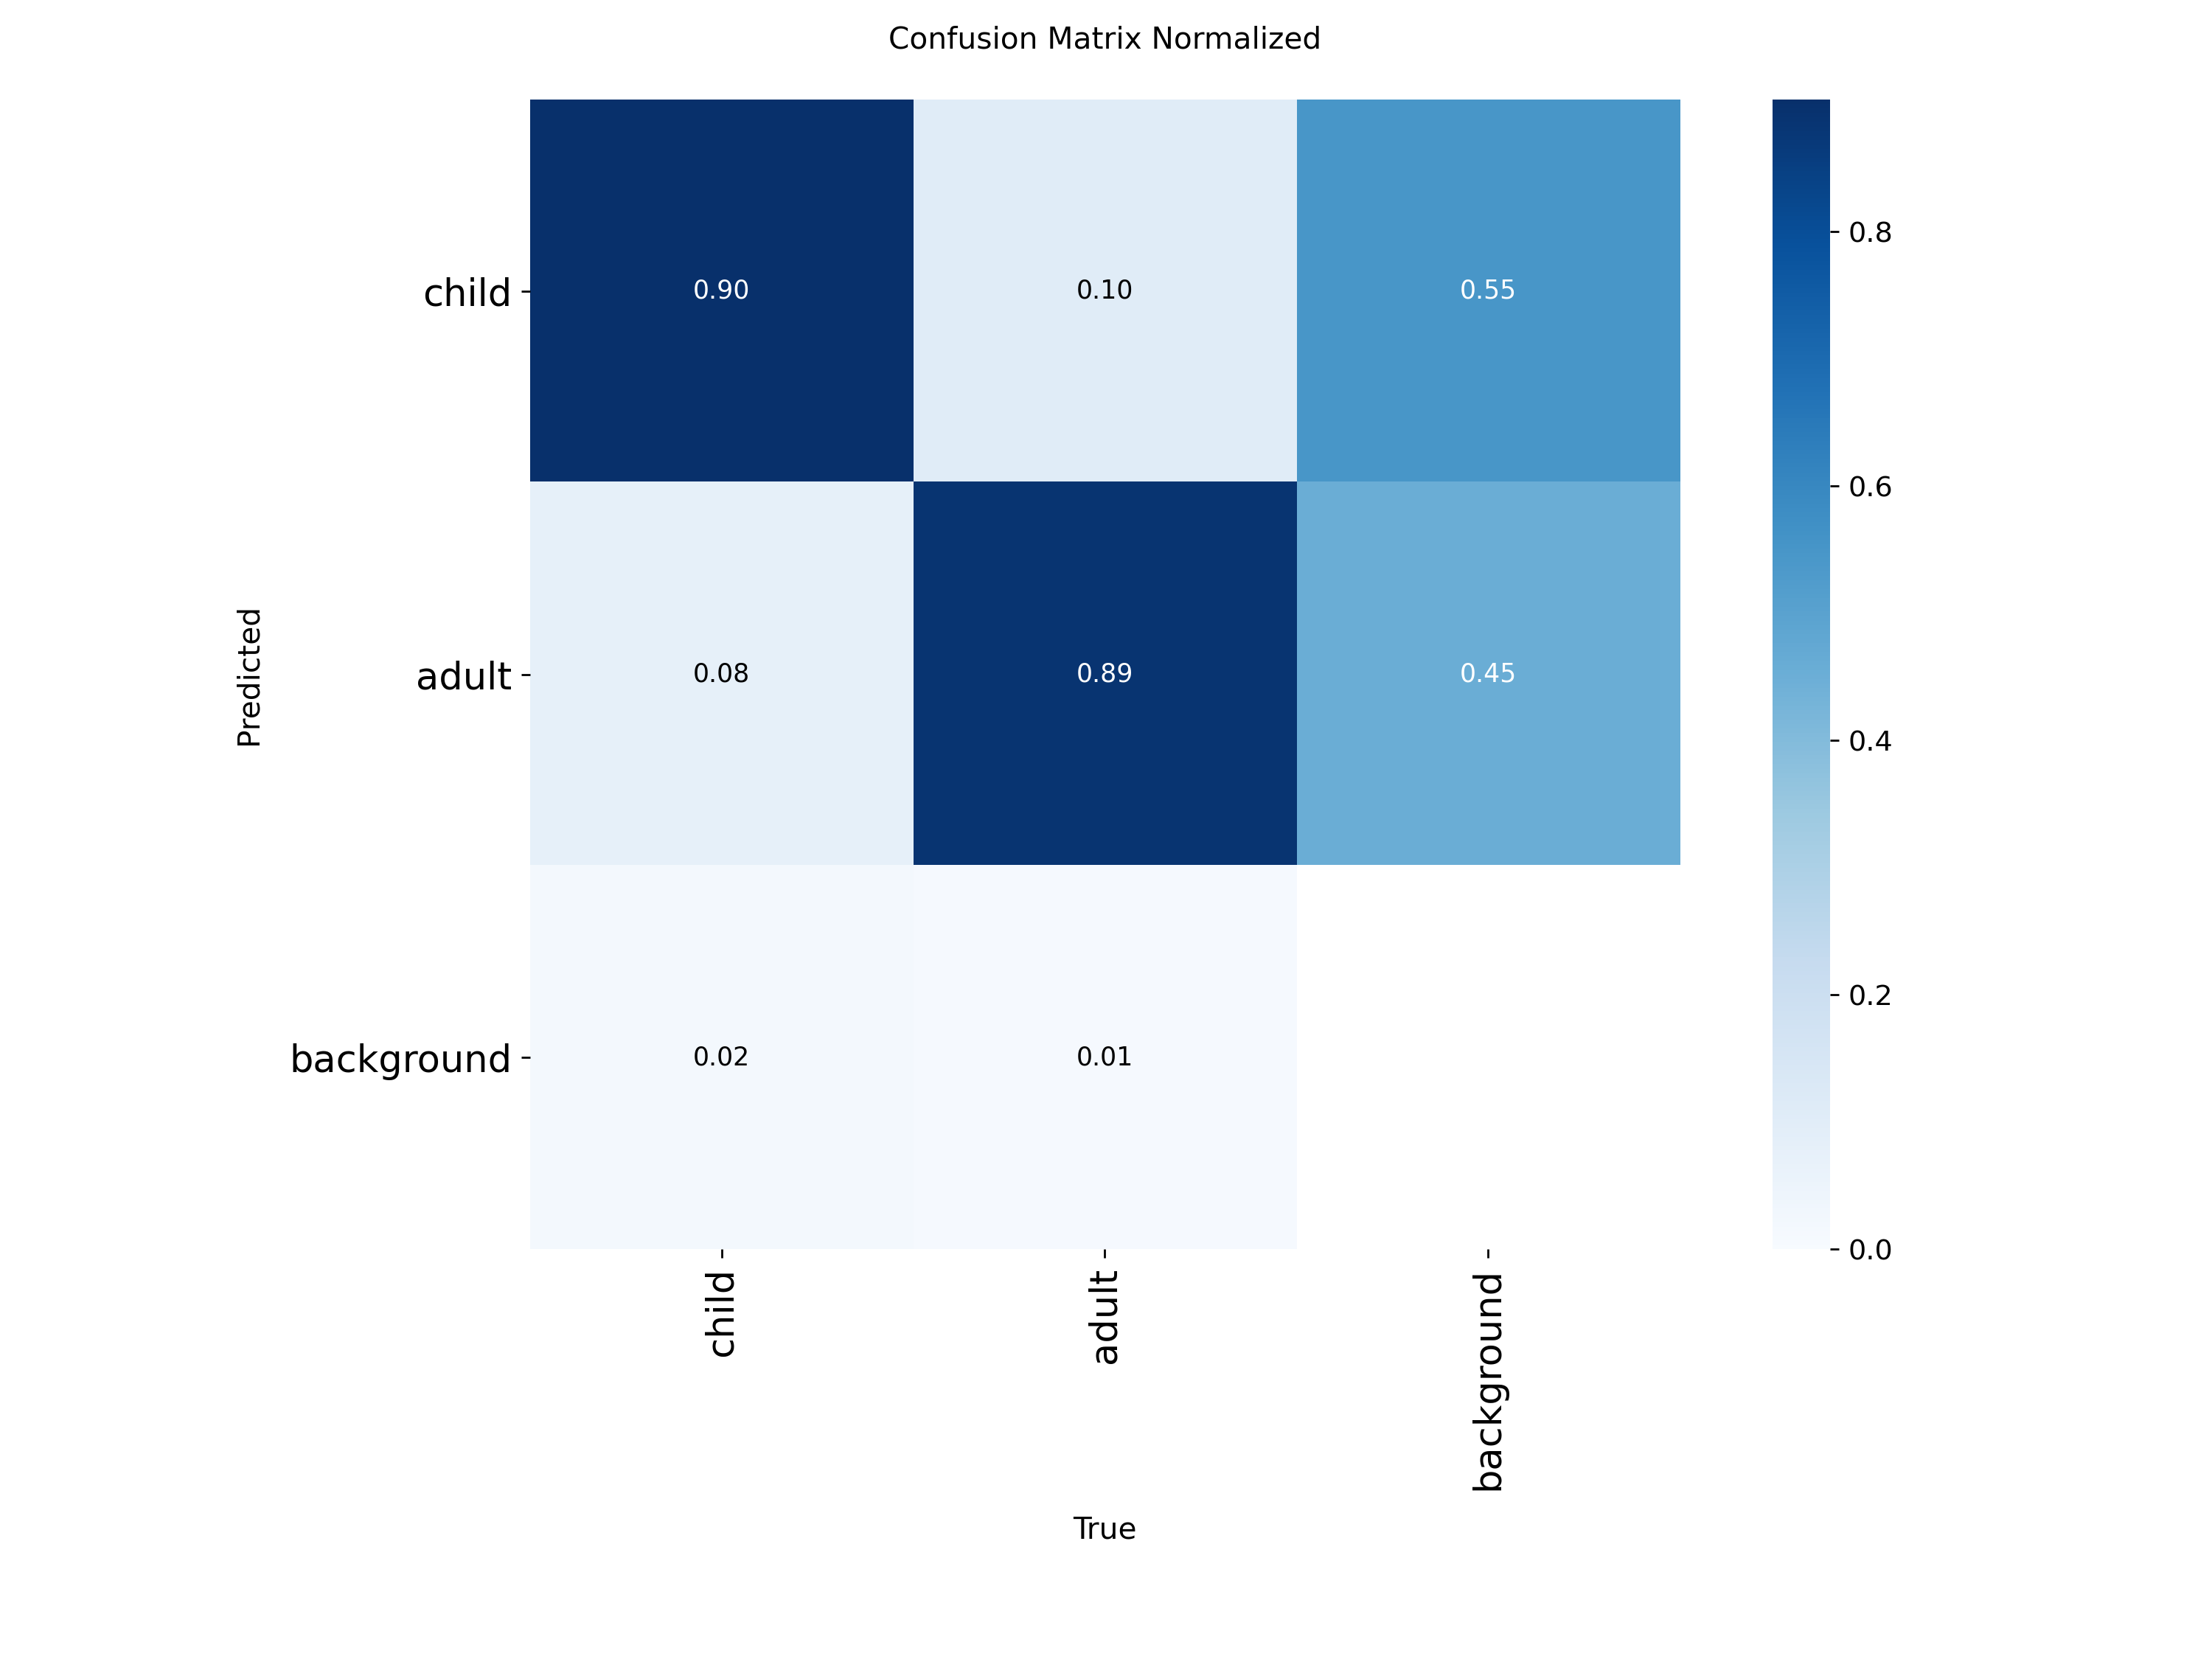


📈 Menampilkan Kurva Kinerja:


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\kenny\\OneDrive - Bina Nusantara\\Sem 5\\Deep Learning\\DL_Projects\\DeepLearningAIModel\\runs\\detect\\train11\\P_curve.png'

In [16]:
import os
import pandas as pd
from IPython.display import Image, display

# Pastikan variabel 'results' berasal dari proses training yang baru saja selesai
# 'results = model.train(...)'
save_dir = results.save_dir

# --- 1. Menampilkan CSV Hasil (results.csv) ---
print("📊 Menampilkan file results.csv:")
results_df = pd.read_csv(os.path.join(save_dir, 'results.csv'))
display(results_df)

# --- 2. Menampilkan Grafik Hasil (results.png) ---
print("\n📈 Menampilkan grafik results.png:")
display(Image(filename=os.path.join(save_dir, 'results.png'), width=800))

# --- 3. Menampilkan Confusion Matrix ---
print("\n🖼️ Menampilkan Confusion Matrix (Jumlah Prediksi):")
display(Image(filename=os.path.join(save_dir, 'confusion_matrix.png'), width=600))

print("\n🖼️ Menampilkan Confusion Matrix (Normalisasi/Persentase):")
display(Image(filename=os.path.join(save_dir, 'confusion_matrix_normalized.png'), width=600))

# --- 4. Menampilkan Kurva Kinerja (Precision, Recall, F1) ---
print("\n📈 Menampilkan Kurva Kinerja:")
display(Image(filename=os.path.join(save_dir, 'P_curve.png'), width=600)) # Precision Curve
display(Image(filename=os.path.join(save_dir, 'R_curve.png'), width=600)) # Recall Curve
display(Image(filename=os.path.join(save_dir, 'F1_curve.png'), width=600))# F1-Score Curve

# --- 5. Menampilkan Contoh Batch Training ---
print("\n🖼️ Menampilkan contoh batch dari data training (dengan augmentasi):")
# YOLO biasanya menyimpan 3 batch pertama (train_batch0, train_batch1, train_batch2)
display(Image(filename=os.path.join(save_dir, 'train_batch0.jpg'), width=800))

# --- 6. Menampilkan Contoh Batch Validasi ---
print("\n🖼️ Menampilkan contoh batch dari data validasi (label asli vs. prediksi):")
# Menampilkan label asli
print("Label Asli (Ground Truth):")
display(Image(filename=os.path.join(save_dir, 'val_batch0_labels.jpg'), width=800))
# Menampilkan hasil prediksi model pada batch yang sama
print("Hasil Prediksi Model:")
display(Image(filename=os.path.join(save_dir, 'val_batch0_pred.jpg'), width=800))